In [2]:
import opendatasets as od

In [8]:
import ssl
od.download("https://www.kaggle.com/code/edenbrekke/cereal-demo-notes")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gayathiri3
Your Kaggle Key: ········


ImportError: cannot import name 'get_host' from 'urllib3.util.url' (C:\Users\MONISHA\anaconda3\envs\task\lib\site-packages\urllib3\util\url.py)

In [9]:
mkdir .kaggle


In [14]:
!move kaggle.json .kaggle


        1 file(s) moved.


In [15]:
!kaggle competitions list


ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        834           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        880           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000       1708           False  
https://www.kaggle.com/competitions/predict-student-performance-from-game-play     2023-06-14 23:59:00  Featured            $55,000       1137           False  
https://www.kaggle.com/competition

In [17]:
!kaggle datasets download -d crawford/80-cereals


  0%|          | 0.00/2.24k [00:00<?, ?B/s]
100%|##########| 2.24k/2.24k [00:00<00:00, 148kB/s]


In [25]:
from zipfile import ZipFile
zip = ZipFile('80-cereals.zip')
zip.extractall()

In [1]:
import pandas as pd
data=pd.read_csv("cereal.csv")

In [2]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
data = data.assign(ProCal = data.calories * data.protein)

In [4]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,ProCal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,280
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,360
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,280
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,200
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,220


In [5]:
data.to_csv("updated.csv", index=False)

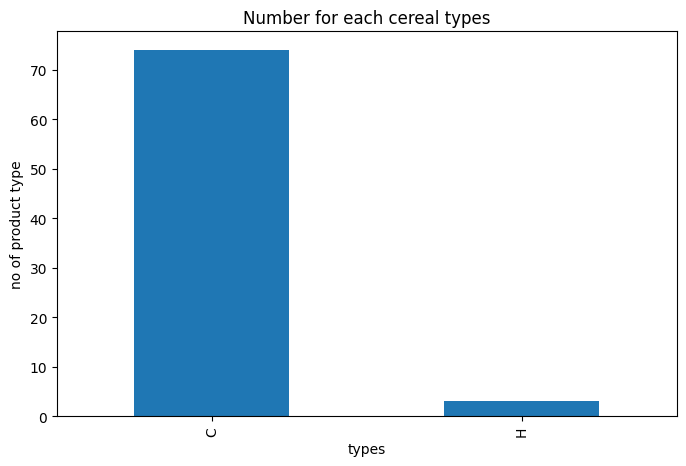

In [13]:
import matplotlib.pyplot as plt
x = data['type'].value_counts().plot(kind='bar',figsize=(8,5),title="Number for each cereal types")
x.set_xlabel("types")
x.set_ylabel("no of product type")
plt.show()

In [15]:
print(data['protein'].unique())

[4 3 2 1 6 5]


In [31]:
a=data['protein']
b=data['calories']
sum=[]
value=0
key=data['protein'].unique()
print(data['protein'].unique())
for i in data['protein'].unique():
    for a,b in zip(data['protein'],data['calories']):
        if i==a:
            value+=b
    
    sum.append(value)
    value=0
            
print(sum)
            
    

[4 3 2 1 6 5]
[790, 3160, 2560, 1400, 220, 100]


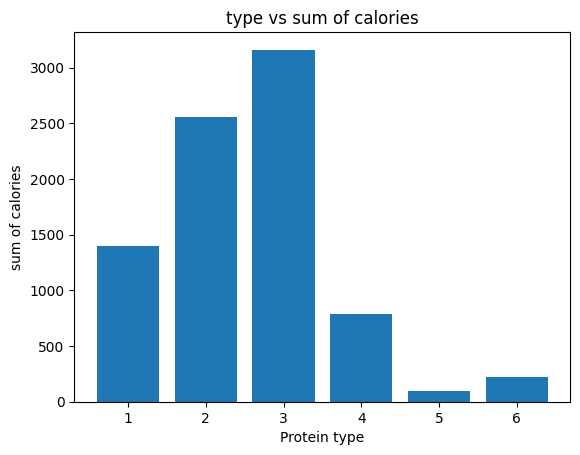

In [33]:
import matplotlib.pyplot as plt
plt.bar(key, sum)
plt.title('type vs sum of calories')
plt.xlabel("Protein type")
plt.ylabel("sum of calories")
plt.show()

# top 10 high  fiber

In [12]:
# top= dict(lambda name:val for (name, val) in zip(data['name'], data['calories']))
top={name: val for name, val in zip(data['name'], data['fiber'])}
# top=sorted(top)

top=sorted(top.items(), key=lambda x:x[1],reverse=True)
top_10=dict(top[0:10])
print(top_10)

{'All-Bran with Extra Fiber': 14.0, '100% Bran': 10.0, 'All-Bran': 9.0, 'Post Nat. Raisin Bran': 6.0, 'Bran Flakes': 5.0, 'Fruit & Fibre Dates; Walnuts; and Oats': 5.0, 'Fruitful Bran': 5.0, 'Raisin Bran': 5.0, 'Bran Chex': 4.0, "Cracklin' Oat Bran": 4.0}


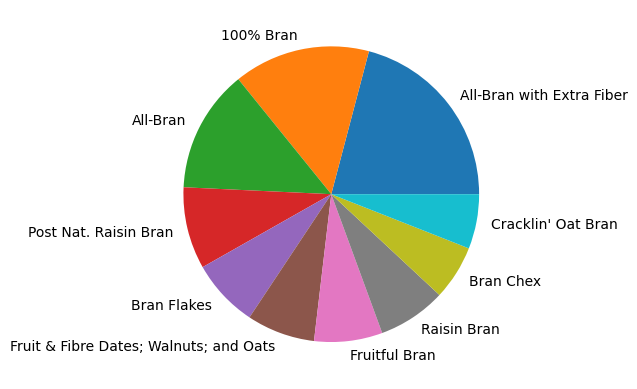

In [14]:

plt.pie(top_10.values(),labels = top_10.keys())
plt.show() 